# Исследование успешности компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

- Шаг 1. Изучим общую информацию
- Шаг 2. Подготовим данные
- Шаг 3. Проведем исследовательский анализ данных
- Шаг 4. Составим портрет пользователя каждого региона
- Шаг 5. Проверим гипотезы
- Шаг 6. Общий вывод

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
- Данные за 2016 год могут быть неполными.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from scipy import stats as st
import matplotlib.pyplot as plt # импортируем необходимые для проекта библиотеки 

In [2]:
data = pd.read_csv('/datasets/games.csv')

- Выведем первые 20 строчек датафрейма `data` на экран.

In [3]:
display(data.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


- Выведем основную информацию о датафрейме с помощью метода `info()`.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:**
- В данных есть пропуски, названия столбцов записаны с использованием верхнего регистра, также в некоторых столбцах нужно изменить тип данных

### Предобработка данных

- Приведем названия столбцов к нижнему регистру:

In [5]:
data.columns = data.columns.str.lower()

- Обработаем пропуски и преобразуем данные в нужные типы:

In [6]:
display(data.isna().sum())


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

- Удалим строки с пропусками в столбцах name и year_of_release. Пропущенные значения в столбце name заполнить не представляется возможным, да и значений всего 2. Значения с пропущенным годом важны для дальнейшего исследования. Можно, конечно, заполнить вручную, но на такую работу уйдет большое количество времени, а самих пропущенных значений не так много относительно всего датасета (менее 2%)

In [9]:
data_name_na = data[data['name'].isna()]
data_name_na_sum_sales = data_name_na[['na_sales','eu_sales','jp_sales', 'other_sales']].sum()
display(data_name_na_sum_sales) #перед удалением взглянем на суммы продаж, для того, что бы не удалить весомую часть датасета
data =  data.dropna(subset=['name']).reset_index(drop=True) #удалим 2 строчки с пропущенными названиями

na_sales       1.78
eu_sales       0.53
jp_sales       0.03
other_sales    0.08
dtype: float64

In [10]:
data_year_na = data[data['year_of_release'].isna()]
data_year_na_sum_sales = data_year_na[['na_sales', 'eu_sales','jp_sales', 'other_sales']].sum()
display(data_year_na_sum_sales)#перед удалением взглянем на суммы продаж, для того, что бы не удалить весомую часть датасета
data =  data.dropna(subset=['year_of_release']).reset_index(drop=True) #удалим 269 строчек с пропущенными годами релиза

na_sales       59.15
eu_sales       24.46
jp_sales        6.70
other_sales     8.61
dtype: float64

- Приведем столбец с годом релиза к целочисленным значениям:

In [11]:
data['year_of_release'] = data['year_of_release'].astype(int)

- В столбце critic_score много пропущенных значений. Их трогать не будем, тип значений float, так же оставляем как есть.

In [12]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Рассмотрим уникальные значения для столбца user_score. Также много пропусков, оставим их как есть. Помимо пропусков тут есть аббревиатура 'tbd', гугл говорит нам: "TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято." Заменим 'tbd' на nan и приведем значения к типу float, для возможности проведения вычислительных операций со столбцом.

In [13]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
data['user_score'] = data['user_score'].astype(float)

Рассмотрим уникальные значения для столбца rating.

In [14]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменим рейтинг К-А на Е, т.к. они обозначают одну возрастную группу. Пропуски заменим 'unknown', т.к. столбец с типом данных object.

In [15]:
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'] = data['rating'].fillna('unknown')

In [16]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

- Добавим в датасет новый столбец с суммой продаж во всех регионах:

In [17]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

- Проверим датасет на наличие дубликатов:

In [18]:
display(data.duplicated().sum())
display(data.duplicated(subset=['name', 'platform', 'year_of_release']).sum())
display(data[data.duplicated(subset=['name', 'platform', 'year_of_release'])])
display(data[(data['name']=='Madden NFL 13') & (data['platform']=='PS3')])

0

1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


- по столбцам 'name', 'platform', 'year_of_release' найден 1 дубликат: Madden NFL 13 для платформы PS3, оставим первую строчку, т.к. по количеству продаж больше похожа на правду, в сравнении с другими платформами. 

In [19]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

- Выведем еще раз информацию по датасету:

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


**Вывод:** 
- в предобработке данных мы удалили строки с пропуском значений в столбцах name и year_of_release.
- пропуски в столбцах critic_score и user_score не трогали, для возмоджности проведения вычислительных операций с этими столбцами.
- Пропуски в столбце rating заменили на 'unknown'.
- Добавили столбец с суммой продаж во всех регионах.
- Проверили датасет на наличие дубликатов.


### Исследовательский анализ данных

- Построим гистограмму распределения выпуска игр по годам

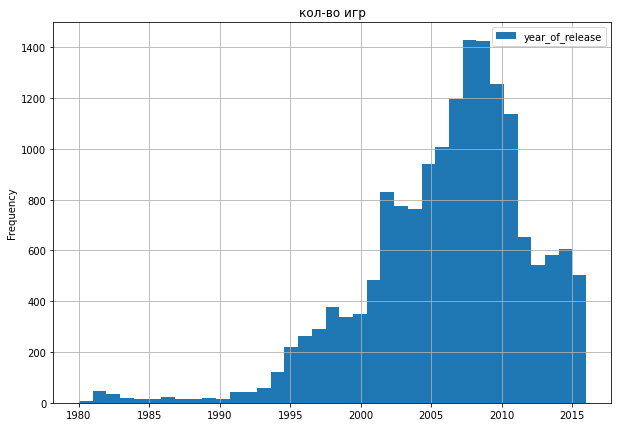

In [21]:
data.plot(kind='hist', y='year_of_release', figsize=(10,7), grid=True, bins=37)
plt.title('кол-во игр')
plt.show()

- По гистограмме видно, что до ~ 1994 г. игр выпускалось мало. Серъезный подьем виден в начале 2000 - ых годов.

Выберем платформы с наибольшими суммарными продажами:

In [22]:
data_pivot_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
data_pivot_platform = data_pivot_platform.sort_values(by='total_sales', ascending=False)
display(data_pivot_platform.head(10))

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Из сводной таблицы можно выделить 6 платформ по сумме продаж: PS2, X360, PS3, Wii, DS, PS.	

Построим распределение продаж по годам для каждой платформы:

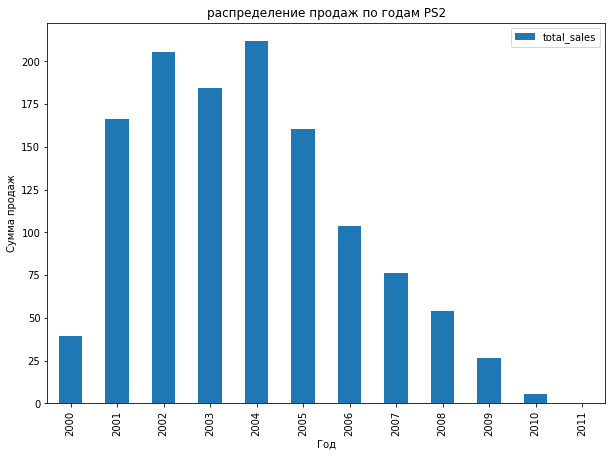

In [23]:
data_ps2 = data[data['platform']=='PS2']
data_ps2_pivot = data_ps2.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
data_ps2_pivot.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('распределение продаж по годам PS2')
plt.show()


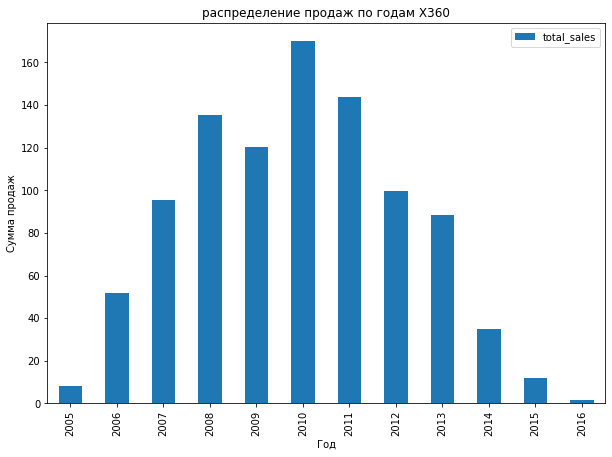

In [24]:
data_x360 = data[data['platform']=='X360']
data_x360_pivot = data_x360.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
data_x360_pivot.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('распределение продаж по годам X360')
plt.show()


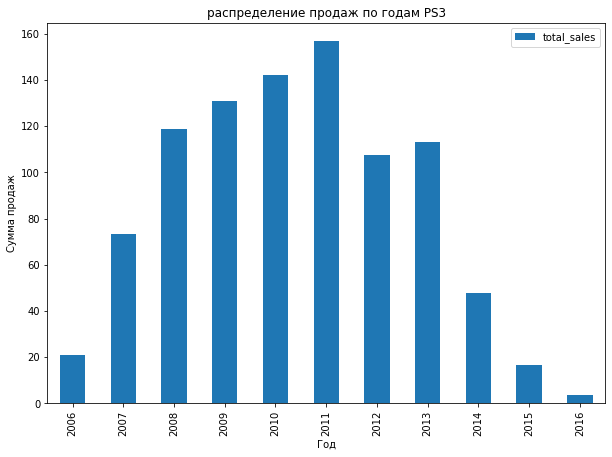

In [25]:
data_ps3 = data[data['platform']=='PS3']
data_ps3_pivot = data_ps3.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
data_ps3_pivot.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('распределение продаж по годам PS3')
plt.show()

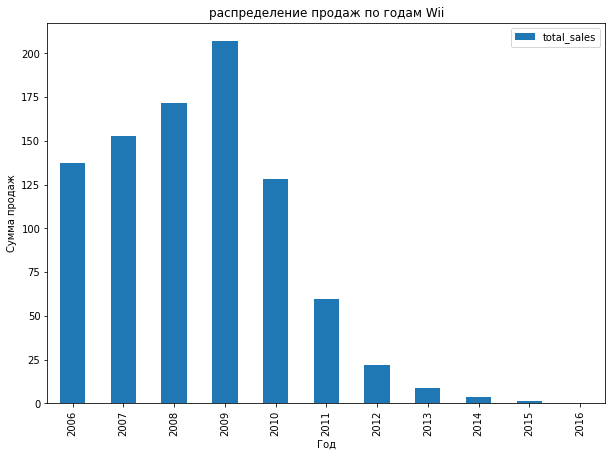

In [26]:
data_wii = data[data['platform']=='Wii']
data_wii_pivot = data_wii.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
data_wii_pivot.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('распределение продаж по годам Wii')
plt.show()

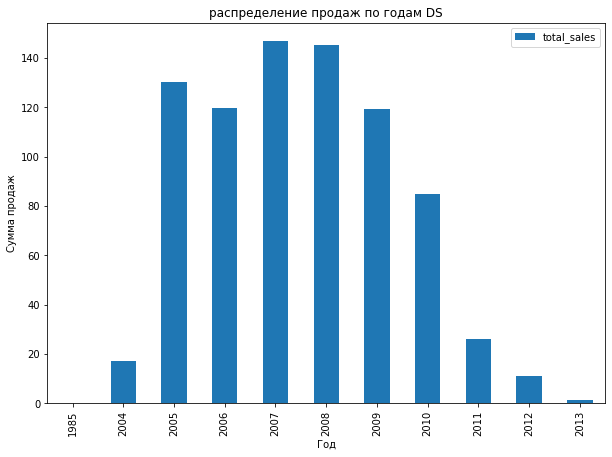

In [27]:
data_ds = data[data['platform']=='DS']
data_ds_pivot = data_ds.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
data_ds_pivot.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('распределение продаж по годам DS')
plt.show()

Странный выброс возле 1985 г., платформа вышла в 2004 году. Избавимся от него:

In [28]:
display(data[(data['platform']=='DS') & (data['year_of_release']<2000)])
data = data.drop(index=[15704], axis=0)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


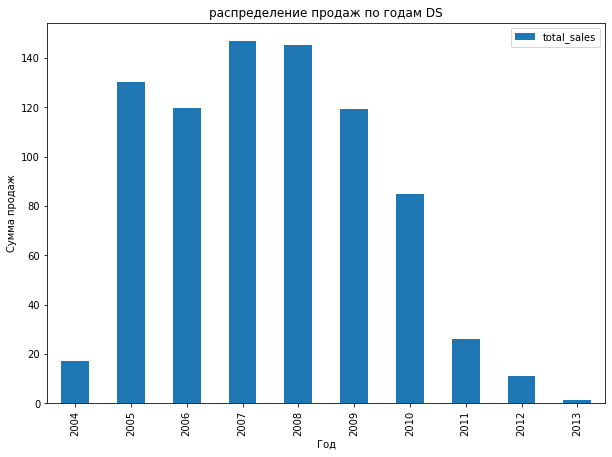

In [29]:
data_ds = data[data['platform']=='DS']
data_ds_pivot = data_ds.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
data_ds_pivot.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('распределение продаж по годам DS')
plt.show()

In [30]:
# check
data[(data['platform']=='DS') & (data['year_of_release']>2000)].head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown,24.67


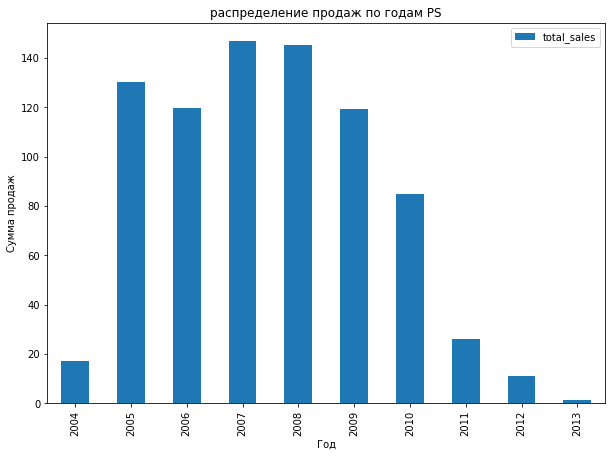

In [31]:
data_ps = data[data['platform']=='PS']
data_ps_pivot = data_ds.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
data_ps_pivot.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('распределение продаж по годам PS')
plt.show()

- По построенным гистограммам видно, что  характерный срок от начала до завершения продаж по крупным платформам около 10-12 лет. Рост продаж виден в первые 4-5 лет, после этого срока идет спад продаж, так же на примере PS, PS2 и PS3 хорошо видно, что они сменялись так же, через 6 лет, но т.к. в последние годы перед сменой был спад продаж, возьмем срок "жизни платформы" - 4 года.

In [32]:
data_actual = data[data['year_of_release']>2012] #оставим только значения за интересующий нас период: 2013-2016 
display(data_actual)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


Составим рейтинг продаж за актуальный период:

In [33]:
data_pivot_platform_actual = data_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')
data_pivot_platform_actual = data_pivot_platform_actual.sort_values(by='total_sales', ascending=False)
display(data_pivot_platform_actual.head(10))

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Построим распределение продаж по годам для каждой платформы:

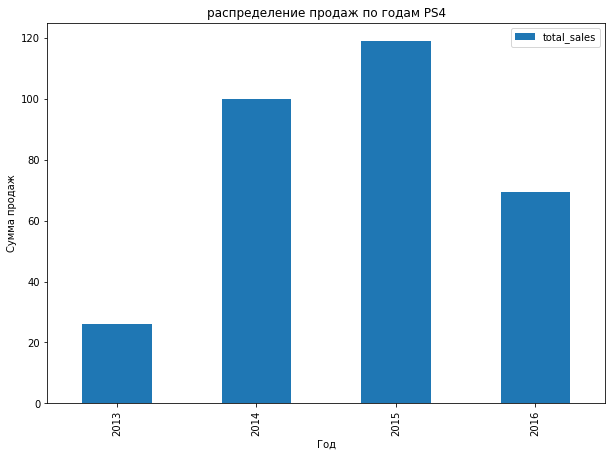

In [34]:
data_ps4 = data_actual[data_actual['platform']=='PS4']
data_ps4_pivot = data_ps4.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
data_ps4_pivot.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('распределение продаж по годам PS4')
plt.show()

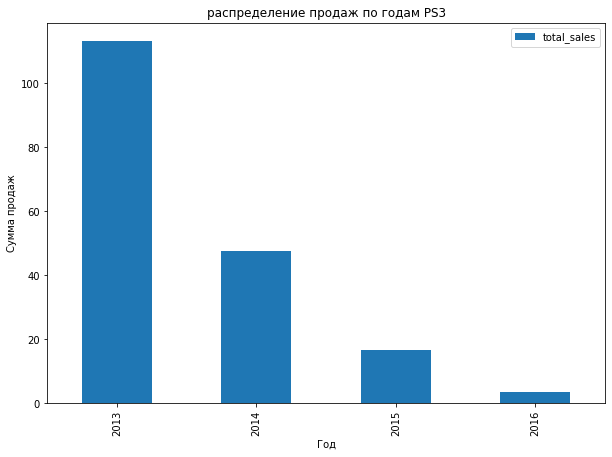

In [35]:
data_ps3 = data_actual[data_actual['platform']=='PS3']
data_ps3_pivot = data_ps3.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
data_ps3_pivot.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('распределение продаж по годам PS3')
plt.show()

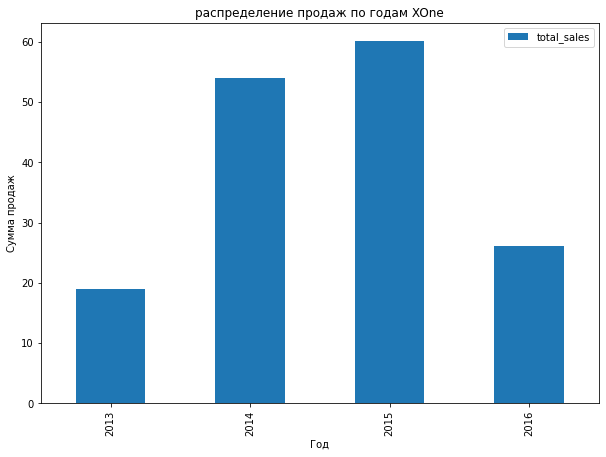

In [36]:
data_xone = data_actual[data_actual['platform']=='XOne']
data_xone_pivot = data_xone.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
data_xone_pivot.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('распределение продаж по годам XOne')
plt.show()

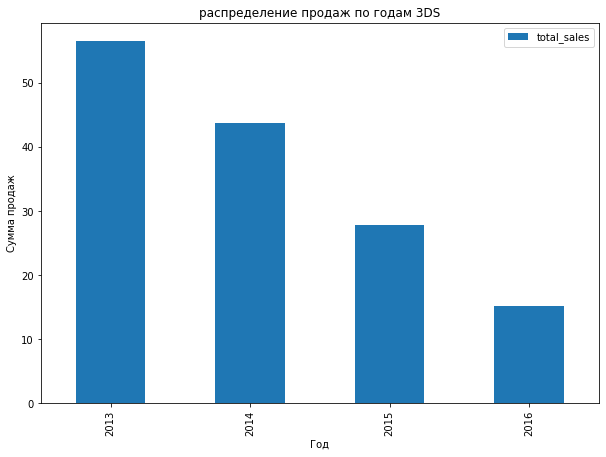

In [37]:
data_3ds = data_actual[data_actual['platform']=='3DS']
data_3ds_pivot = data_3ds.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
data_3ds_pivot.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('распределение продаж по годам 3DS')
plt.show()

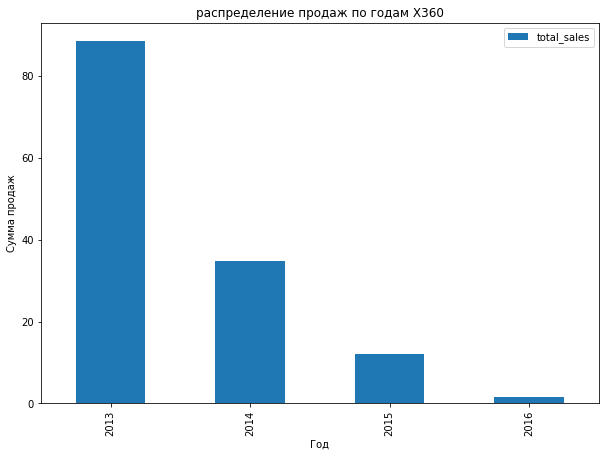

In [38]:
data_x360 = data_actual[data_actual['platform']=='X360']
data_x360_pivot = data_x360.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
data_x360_pivot.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('распределение продаж по годам X360')
plt.show()

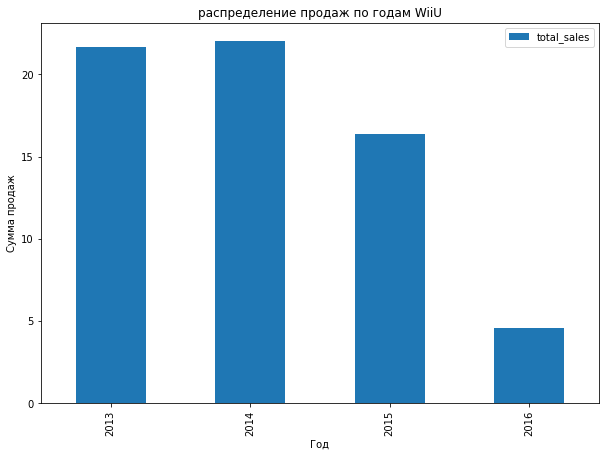

In [39]:
data_wiiu = data_actual[data_actual['platform']=='WiiU']
data_wiiu_pivot = data_wiiu.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
data_wiiu_pivot.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('распределение продаж по годам WiiU')
plt.show()

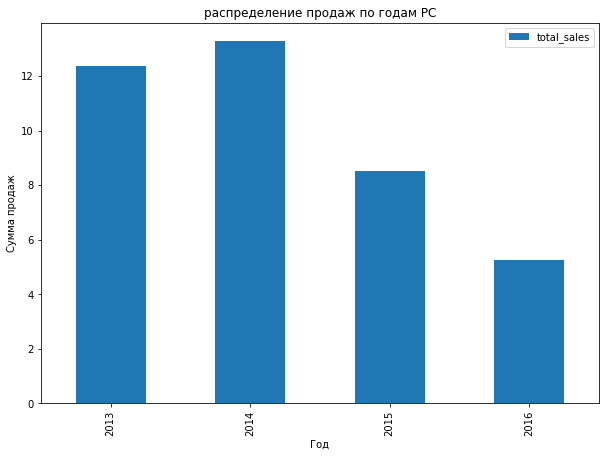

In [40]:
data_pc = data_actual[data_actual['platform']=='PC']
data_pc_pivot = data_pc.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
data_pc_pivot.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('распределение продаж по годам PC')
plt.show()

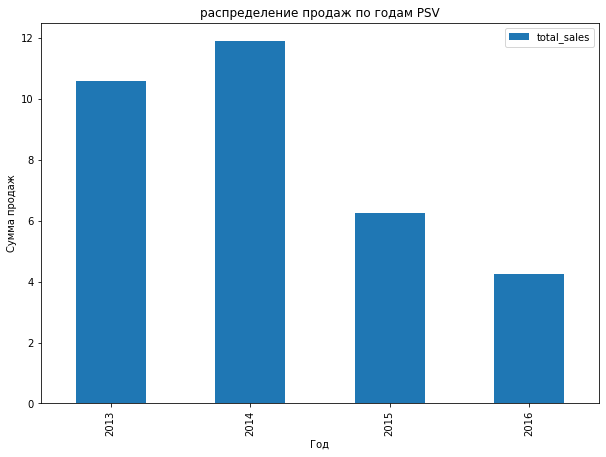

In [41]:
data_psv = data_actual[data_actual['platform']=='PSV']
data_psv_pivot = data_psv.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
data_psv_pivot.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('распределение продаж по годам PSV')
plt.show()

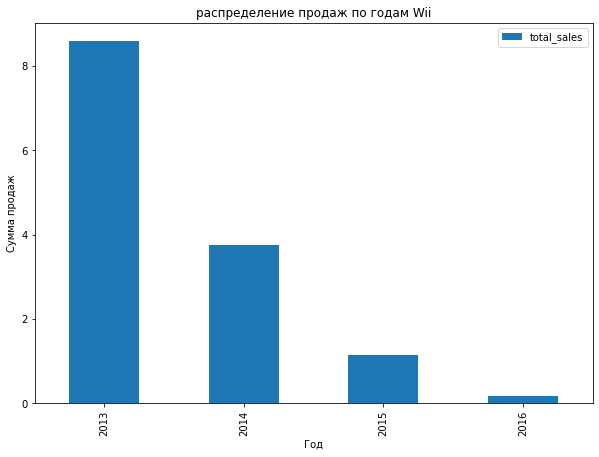

In [42]:
data_wii = data_actual[data_actual['platform']=='Wii']
data_wii_pivot = data_wii.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
data_wii_pivot.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('распределение продаж по годам Wii')
plt.show()

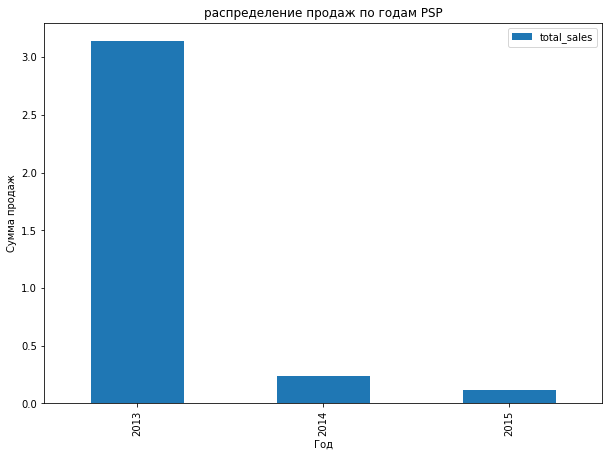

In [43]:
data_psp = data_actual[data_actual['platform']=='PSP']
data_psp_pivot = data_psp.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
data_psp_pivot.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('распределение продаж по годам PSP')
plt.show()

- По построенным диаграммам видно, на подъеме находятся платформы PS4 и XOne, у них есть спад в 2016 году, но это может быть связана с неполными данными за этот год. продажи остальных падают.

построим диаграммы размаха для выбранных платформ:

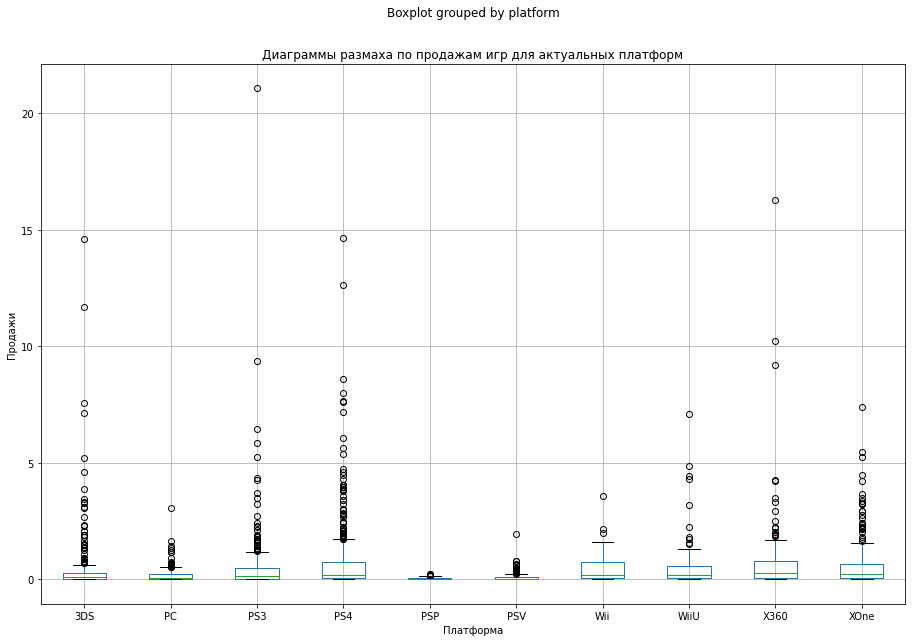

In [44]:
actual_platform = ["PS4", "PS3", "XOne", "3DS", "X360", "WiiU", "PC", "PSV", "Wii", "PSP"] #Сохраним список актуальных платформ

(data_actual.query('platform in @actual_platform')[['platform', 'name', 'total_sales']]
 .boxplot(column='total_sales', by='platform', figsize=(15,10))
)
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Диаграммы размаха по продажам игр для актуальных платформ')
plt.show()


и в увеличенном масштабе:

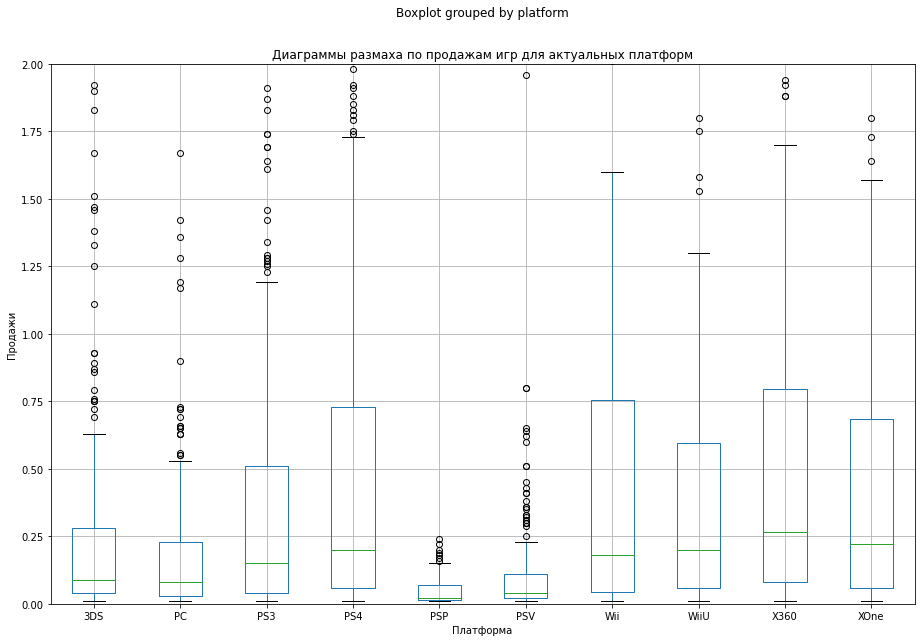

In [45]:
(data_actual.query('platform in @actual_platform')[['platform', 'name', 'total_sales']]
 .boxplot(column='total_sales', by='platform', figsize=(15,10))
)
plt.ylim(0,2)
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Диаграммы размаха по продажам игр для актуальных платформ')
plt.show()

- По диаграмме размаха мы видим приемущества PS4, у нее больше всех выбросов, что говорит о большом количестве игр-бестселлеров, а так же самый широкий размах "усов". PS4, X360, XOne и Wii так же имеют широкий "ящик" и высокую медиану, что говорит о хороших продажах. У 3DS и PS3 тоже большое количество выбросов и у PS3 самый большой выброс, выше 20 млн.! PC не может похвастаться ни высокими выбросами, ни широким "ящиком" и "усами".

Рассмотрим как влияют на продажи внутри популярной платформы отзывы пользователей и критиков, для начала на самой популярной платформе - PS4:

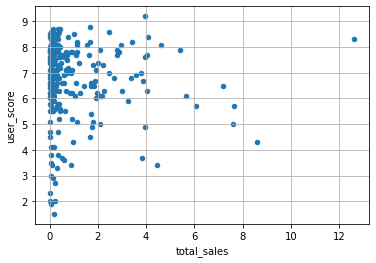

-0.031957110204556376


In [46]:
#Построим диаграмму рассеяния для зависимости продаж от оценки пользователей
data_ps4.plot(x='total_sales', y='user_score', kind = 'scatter', grid=True)
plt.show()
#Посчитаем коэффициент корреляции
print(data_ps4['total_sales'].corr(data_ps4['user_score']))

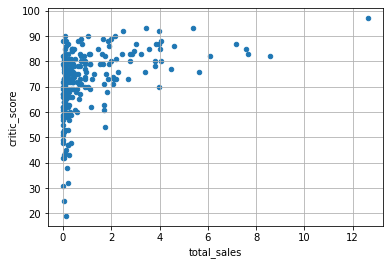

0.406567902061781


In [47]:
#Построим диаграмму рассеяния для зависимости продаж от оценки критиков
data_ps4.plot(x='total_sales', y='critic_score', kind = 'scatter', grid=True)
plt.show()
#Посчитаем коэффициент корреляции
print(data_ps4['total_sales'].corr(data_ps4['critic_score']))

Попробуем сделать тоже самое для менее популярной платформы из нашего рейтинга по продажам:

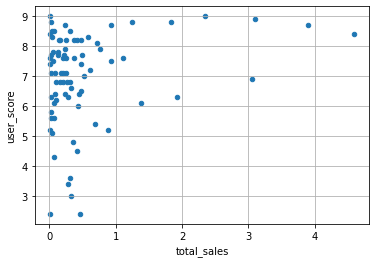

0.24150411773563016


In [48]:
#Построим диаграмму рассеяния для зависимости продаж от оценки пользователей
data_3ds.plot(x='total_sales', y='user_score', kind = 'scatter', grid=True)
plt.show()
#Посчитаем коэффициент корреляции
print(data_3ds['total_sales'].corr(data_3ds['user_score']))

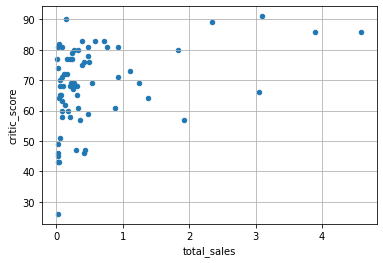

0.35705661422881035


In [49]:
#Построим диаграмму рассеяния для зависимости продаж от оценки критиков
data_3ds.plot(x='total_sales', y='critic_score', kind = 'scatter', grid=True)
plt.show()
#Посчитаем коэффициент корреляции
print(data_3ds['total_sales'].corr(data_3ds['critic_score']))

- В обоих случаях связь между продажами и оценками пользователей слабая. Связь между продажами и оценками критиков выше, по шкале Чедока - умеренная.

Рассмотрим общее распределение игр по жанрам:

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


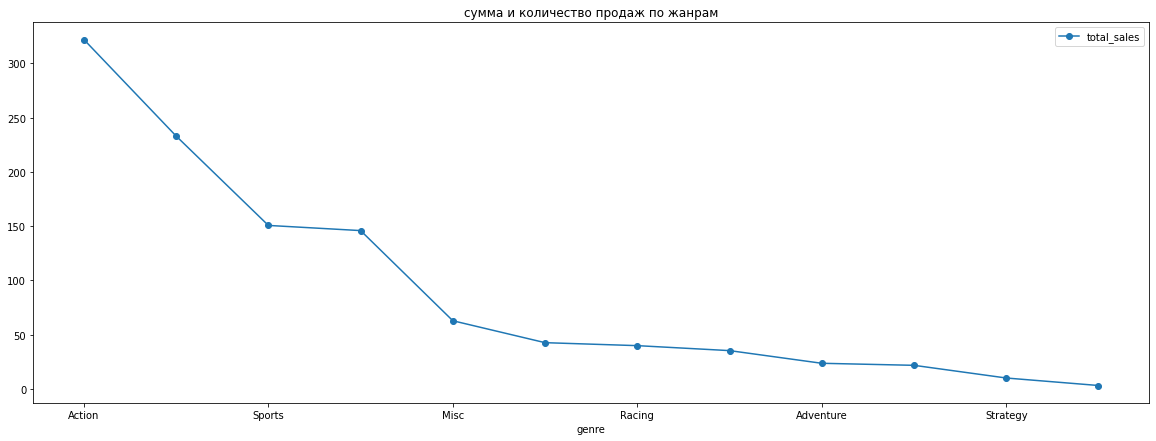

In [50]:
data_pivot_genre_actual = data_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum')
data_pivot_genre_actual = data_pivot_genre_actual.sort_values(by='total_sales', ascending=False)
display(data_pivot_genre_actual.head(15))
data_pivot_genre_actual.plot(figsize=(20,7), style='o-')
plt.title('сумма и количество продаж по жанрам')
plt.show()

Построим диаграмму размаха:


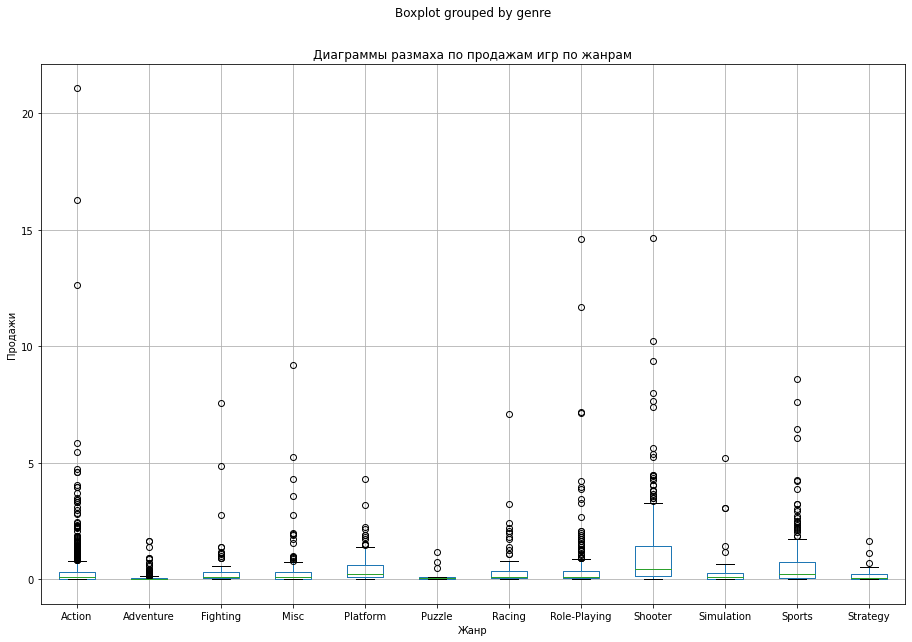

In [51]:
actual_genre = ["Action", "Shooter", "Sports", "Role-Playing", "Misc", "Platform", "Racing", "Fighting", "Adventure",\
                "Simulation", "Strategy", "Puzzle"] #Сохраним список актуальных жанров


(data_actual.query('genre in @actual_genre')[['genre', 'total_sales']]
 .boxplot(column='total_sales', by='genre', figsize=(15,10))
)

plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.title('Диаграммы размаха по продажам игр по жанрам')
plt.show()

Уменьшим масштаб:

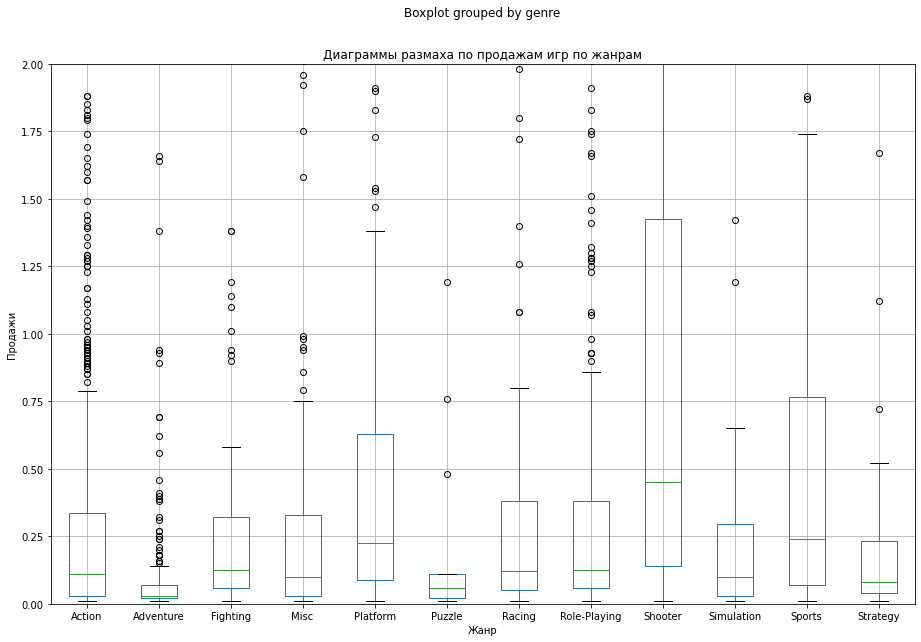

In [52]:
(data_actual.query('genre in @actual_genre')[['genre', 'total_sales']]
 .boxplot(column='total_sales', by='genre', figsize=(15,10))
)

plt.ylim(0,2)
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.title('Диаграммы размаха по продажам игр по жанрам')
plt.show()

- Лидером и по сумме и по количеству является экшн игры, так же у них самые большие выбросы по количеству и значению, yj медиана не высокая, что подтверждает такое высокое место в рейтинге за счет бестселлеров. Далее выделим шутеры, у них самый широкий "ящик" и самая высокая медиана. Далее можно выделить сортивные игры, у них тоже высокая медиана, широкий "ящик" и не малое количество выбросов. Следующими можно выделить гонки, ролевые и платформеры. У платформеров широкий "ящик" и высокая медиана, но мало выбросов, а у гонок и ролевых, хоть и не высокая медиана, достаточное количество выбросов.

### Составим портрет пользователя каждого региона.

Составим топ 5 платформ для каждого региона:

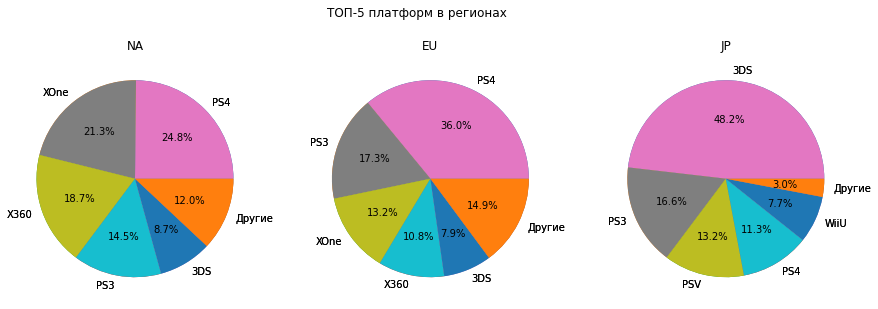

In [53]:
region = data_actual.columns[4:7] # список регионов


fig, axs = plt.subplots(1, 3, figsize=(15, 5)) # круговая диаграмма для каждого региона
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  
  df_i = (data_actual.groupby('platform')[region[i]].sum().
             reset_index().
             sort_values(region[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Другие
  df_i = df_i.append({'platform': 'Другие', region[i]: data_actual[region[i]].sum() - df_i[region[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[region[i]], labels = df_i['platform'])
  axs[i].pie(df_i[region[i]], labels = df_i['platform'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()



- Рейтинги платформ Северной Америки и Европы похожи, на первом месте PS4, замыкает рейтинг 3DS. В Америке более популярны системы XOne и X360, их доля в 2 раза выше чем в Европе. Рейтинг платформ в Японии кардинально отличается, PS4 здесь на предпоследней строчке, а объем продаж в почти в 10 раз ниже чем в европе! А на первом месте 3DS, аутсайдер рейтингов Америки и Европы. Общий объем проданных копий в Японии так же намного ниже (примерно в 2 раза), чем в Америке и Европе.

Составим топ 5 жанров для каждого региона:

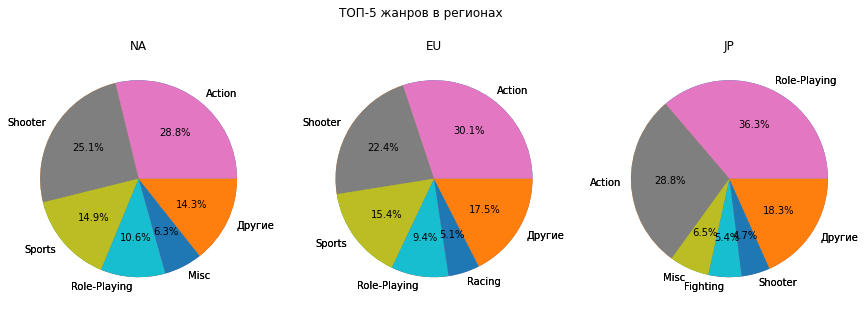

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5)) # круговая диаграмма для каждого региона
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  
  df_i = (data_actual.groupby('genre')[region[i]].sum().
             reset_index().
             sort_values(region[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Другие
  df_i = df_i.append({'genre': 'Другие', region[i]: data_actual[region[i]].sum() - df_i[region[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[region[i]], labels = df_i['genre'])
  axs[i].pie(df_i[region[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

- Рейтинг жанров в Европе и Америки практически идентичны, за исключением последних мест. В Японии рейтинг значительно отличается. Популярные в Европе и Америке шутеры здесь заняли последнее место топа. На первом месте РПГ, которые в Америке и европе лишь на 4 месте.

Рассмотрим влияние рейтинга ESRB на продажи в каждом регионе:

,Северная Америка
rating,
M,165.21
unknown,89.42
E,79.05
E10+,54.24
T,49.79


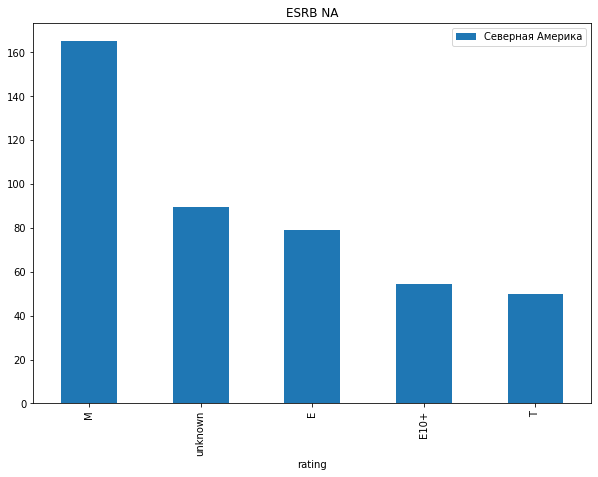

In [55]:
data_pivot_rating_na_actual = data_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum')
data_pivot_rating_na_actual = data_pivot_rating_na_actual.sort_values(by='na_sales', ascending=False)
data_pivot_rating_na_actual.columns = ['Северная Америка']
display(data_pivot_rating_na_actual.head())
data_pivot_rating_na_actual.head().plot(kind='bar', figsize=(10,7))
plt.title('ESRB NA')
plt.show()

,Европа
rating,
M,145.32
E,83.36
unknown,78.91
E10+,42.69
T,41.95


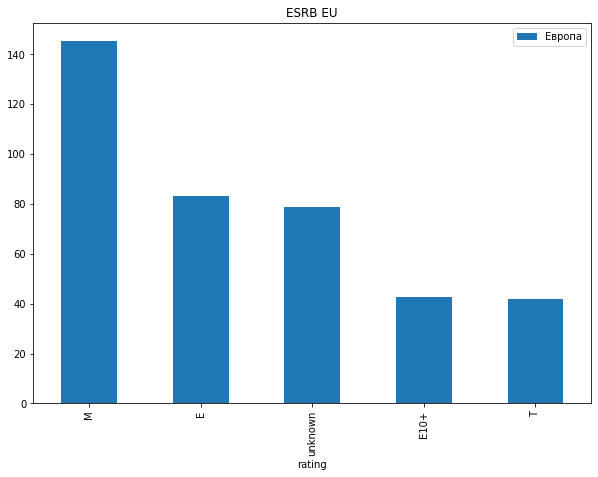

In [56]:
data_pivot_rating_eu_actual = data_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
data_pivot_rating_eu_actual = data_pivot_rating_eu_actual.sort_values(by='eu_sales', ascending=False)
data_pivot_rating_eu_actual.columns = ['Европа']
display(data_pivot_rating_eu_actual.head())
data_pivot_rating_eu_actual.head().plot(kind='bar', figsize=(10,7))
plt.title('ESRB EU')
plt.show()

,Япония
rating,
unknown,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


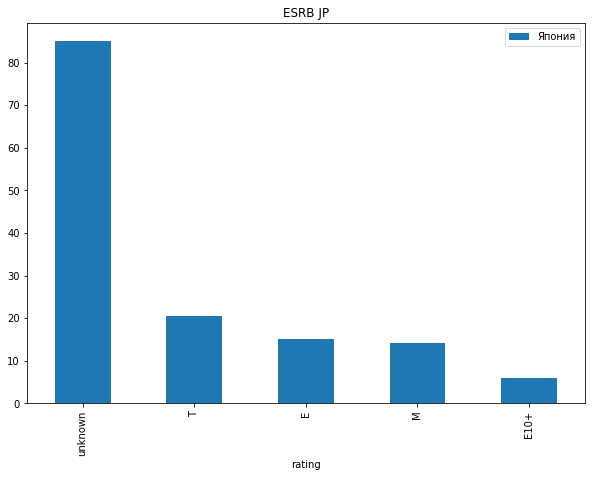

In [57]:
data_pivot_rating_jp_actual = data_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
data_pivot_rating_jp_actual = data_pivot_rating_jp_actual.sort_values(by='jp_sales', ascending=False)
data_pivot_rating_jp_actual.columns = ['Япония']
display(data_pivot_rating_jp_actual.head())
data_pivot_rating_jp_actual.head().plot(kind='bar', figsize=(10,7))
plt.title('ESRB JP')
plt.show()

- Рейтинг ESRB в Европе и Америке практически идентичны, в топе игры для возраста 17+. В Японии же наоборот, игры для возраста 17+ внизу рейтинга, а в топе игры с не присвоенным рейтингом. Скорее всего это связано с тем, что сам по себе этот рейтинг распространяется на США и Канаду.

### Проверка гипотез.

**Гипотеза 1:**

- H0 - Средние пользовательские рейтинги платформ Xbox One и PC равны
- H1 - Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [58]:
data_xone = data_xone[data_xone['user_score'].notna()]

data_pc = data_actual[data_actual['platform']=='PC']
data_pc = data_pc[data_pc['user_score'].notna()]

alpha = 0.05 #Примем уровень статистической значимости 5%
results = st.ttest_ind(data_xone['user_score'], data_pc['user_score'])     

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")          

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


- Для проверки гипотезы мы использовали метод scipy.stats.ttest_ind, т.к. сравнивали выборки 2-х генеральных совокупностей, а не числа со средним. Н1 противоположна Н0. На языке статистики р-значение - вероятность получить значение при условии, что Н0 верна.

**Гипотеза 2:**

- Н0 - Средние пользовательские рейтинги жанров Action и Sports равны
- Н1 - Средние пользовательские рейтинги жанров Action и Sports отличаются

In [60]:
data_action = data_actual[data_actual['genre']=='Action']
data_action = data_action[data_action['user_score'].notna()]

data_sports = data_actual[data_actual['genre']=='Sports']
data_sports = data_sports[data_sports['user_score'].notna()]

alpha = 0.05 #Примем уровень статистической значимости 5%

results = st.ttest_ind(data_action['user_score'], data_sports['user_score'])
print('p_значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

p_значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


- Для проверки гипотезы мы использовали метод scipy.stats.ttest_ind, т.к. сравнивали выборки 2-х генеральных совокупностей, а не числа со средним. Н1 противоположна Н0.

### Общий вывод:

**Нами был проанализирован датасет с данными о компьютерных играх для различных платформ, с данными 1980 - 2016 гг.**
**Мы проанализировали данные и провели предобработку данных:**

- названия столбцов приведены к нижнему регистру
- где это возможно избавились от пропусков
- обработаны дубликаты
- преобразованы типы данных
- добавили столбец суммарных продаж во всех регионах

**Произведен исследовательский анализ данных:**

- рассмотрено количество выпущенных игр по годам
- составлен рейтинг платформ с наибольшими суммарными продажами
- построено распределение продаж по годам для каждой платформы выбранной из рейтинга
- выявлен срок "жизни платформы", и отброшены данные старше этого срока
- составлен рейтинг платформ с наибольшими суммарными продажами по актуальному периоду
- построено распределение продаж по годам для каждой платформы выбранной из рейтинга
- выбраны актуальные платформы, рейтинг продаж которых растет
- построена диаграмма размаха для актуальных платформ
- рассмотрено, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
- рассмотрено общее распределение игр по жанрам

**Составлен портрет пользователя каждого региона:**

- самые популярные платформы для каждого региона
- самые популярные жанры для каждого региона
- влияние рейтинга ESRB на продажи в отдельном регионе

**Проверены 2 гипотезы:**

- средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

**По результатам исследовыния выявлено: до начала 2000 - х годов игр выпускалось мало, срок жизни платформы 10-12 лет, но продажи падают после 4-5 лет. Самая популярная платформа PS4, следом идут XOne и DS3. Отзывы пользователей слабо влияют на продажи, отзывы критиков имеют чуть большее влияние. Самыми популярными жанрами являются: Экшены, шутеры, спортивные и РПГ. Пользовательские портреты Северной Америки и Европы схожи между собой, но отличаются от Японии.  Рейтинг ESRB так же отличается для Японии и Северной Амереки с Европой. В японии самыми популярными стали игры не получившие оценку ESRB (регион ESRB - США и Канада). Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Отвергнута гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.**

**Определяющими успешность игры являются:** 

- регион для которого разрабатывается игра
- платформа 
- жанр игры
- небольшое влияние имеют оценки критиков
